In [1]:
# imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars

from scipy import stats
from scipy.stats import pearsonr, spearmanr

from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.feature_selection import SelectKBest, f_regression, RFE

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import TweedieRegressor
from sklearn.linear_model import LassoLars
from sklearn.cluster import KMeans


# import my functions
import prepare
import functions
import wrangle

# turn off pink warning boxes
import warnings
warnings.filterwarnings("ignore")

In [2]:
red = pd.read_csv('winequality-red.csv')
white = pd.read_csv('winequality-white.csv')

In [3]:
# creating a list for new column
color = 'red'

red.insert(0, 'color', color)
red.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
color = 'white'

white.insert(0, 'color', color)
white.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


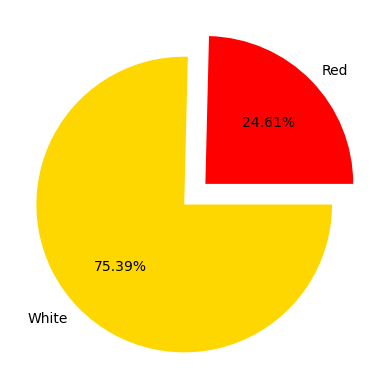

In [5]:
#plotting amount of red and white wines overall
values = [red.shape[0], white.shape[0]]
labels = ('Red', 'White')
plt.pie(values, labels = labels, autopct = "%.2f%%", explode = (0.1, 0.1), colors = ('red', 'gold'))
plt.show()

In [6]:
red.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [7]:
white.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [8]:
wine = pd.concat([white, red], ignore_index=True)
wine.head()


#df = pd.concat([df, dummies], axis = 1)

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [9]:
wine.head()

,color,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [10]:
wine.shape

(6497, 13)

In [11]:
wine.rename(columns = {'fixed acidity' : 'fixed_acidity', 'volatile acidity' : 'volatile_acidity', 
                       'citric acid' : 'citric_acid', 'residual sugar': 'rs', 'free sulfur dioxide': 'free_s02',
                       'total sulfur dioxide' : 'total_s02'}, inplace = True)

In [12]:
wine.head(1)

,color,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6


In [13]:
wine['quality'].head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

<AxesSubplot:ylabel='total_s02'>

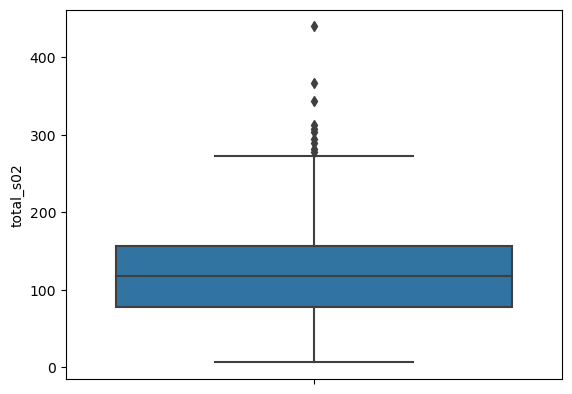

In [14]:
sns.boxplot(data=wine, y = 'total_s02')


In [15]:
wine, var_fences = wrangle.remove_outliers(wine)

color column ignored
quality column ignored


In [16]:
wine.head()

,color,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [17]:
wine.shape

(5757, 13)

In [18]:
wine.quality.value_counts()

6    2533
5    1851
7    1004
8     179
4     172
3      13
9       5
Name: quality, dtype: int64

In [19]:
wine.describe()
    

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality
count,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000,5757.000000
mean,7.034176,0.319750,0.307355,5.591906,0.050010,31.125413,119.781136,0.994420,3.218933,0.514530,10.519964,5.851138
std,0.974296,0.137262,0.122002,4.715453,0.018637,16.437084,53.638754,0.002858,0.155408,0.123028,1.200953,0.863658
min,3.900000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.220000,0.250000,1.800000,0.037000,18.000000,87.000000,0.992050,3.110000,0.420000,9.500000,5.000000
50%,6.900000,0.280000,0.310000,3.400000,0.046000,29.000000,121.000000,0.994560,3.210000,0.500000,10.400000,6.000000
75%,7.500000,0.380000,0.380000,8.400000,0.057000,42.000000,157.000000,0.996660,3.320000,0.590000,11.400000,6.000000
max,10.300000,0.740000,0.670000,20.700000,0.119000,89.000000,303.000000,1.002600,3.720000,0.940000,14.200000,9.000000


In [20]:
#Removing the very few super high quality wines and very few super low quality wines
wine = wine[wine.quality != 9]
wine = wine[wine.quality != 3]

In [21]:
#After removing the high and low qualities we only removed 18 lines(13 low, 5 high) from the dataset
wine.shape

(5739, 13)

# Our wine quality categories now range from 4 to 8

In [22]:
wine.quality.value_counts()

6    2533
5    1851
7    1004
8     179
4     172
Name: quality, dtype: int64

In [23]:
train, val, test = prepare.train_val_test(wine, 'quality')
train.shape, val.shape, test.shape

((4017, 13), (1033, 13), (689, 13))

In [24]:
wine.corr()

,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.184789,0.224927,-0.071021,0.357396,-0.216615,-0.224479,0.378508,-0.237732,0.182199,-0.120596,-0.097641
volatile_acidity,0.184789,1.000000,-0.438855,-0.188370,0.516304,-0.342204,-0.388926,0.224701,0.256112,0.213767,-0.033140,-0.230810
citric_acid,0.224927,-0.438855,1.000000,0.167138,-0.197575,0.199041,0.269549,0.025369,-0.282480,-0.035505,0.011051,0.090093
rs,-0.071021,-0.188370,0.167138,1.000000,-0.108569,0.429072,0.498226,0.611893,-0.282931,-0.165980,-0.397263,-0.044747
chlorides,0.357396,0.516304,-0.197575,-0.108569,1.000000,-0.260095,-0.341479,0.517553,0.240164,0.344114,-0.347254,-0.263200
free_s02,-0.216615,-0.342204,0.199041,0.429072,-0.260095,1.000000,0.711680,0.116603,-0.168395,-0.148631,-0.195179,0.067856
total_s02,-0.224479,-0.388926,0.269549,0.498226,-0.341479,0.711680,1.000000,0.142080,-0.259219,-0.233621,-0.298677,-0.054430
density,0.378508,0.224701,0.025369,0.611893,0.517553,0.116603,0.142080,1.000000,0.050104,0.213899,-0.756523,-0.325071
pH,-0.237732,0.256112,-0.282480,-0.282931,0.240164,-0.168395,-0.259219,0.050104,1.000000,0.306233,0.087432,0.027356
sulphates,0.182199,0.213767,-0.035505,-0.165980,0.344114,-0.148631,-0.233621,0.213899,0.306233,1.000000,0.004344,0.046815


# Density and Quality

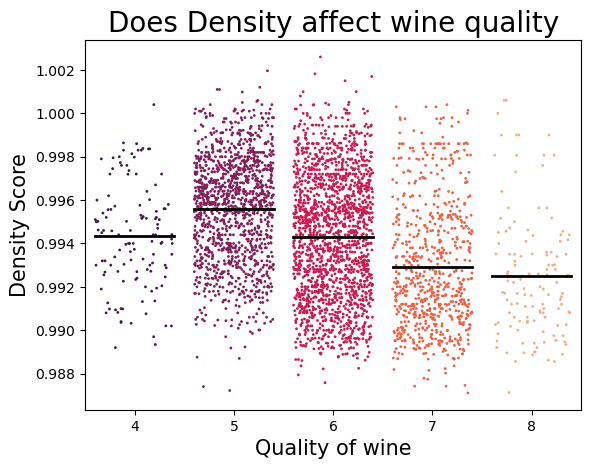

In [25]:
# Creating a visual displaying amount distro comapred to mean
p = sns.stripplot(y =train.density, x = train.quality, data = train, size = 2, jitter = .4, palette = 'rocket')
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="quality",
            y="density",
            data=train,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
plt.ylabel('Density Score', fontdict = { 'fontsize': 15})
plt.xlabel('Quality of wine', fontdict = { 'fontsize': 15})
plt.title('Does Density affect wine quality', fontdict = { 'fontsize': 20})
plt.show()

The lower the density, the better the wine quality


In [26]:
results1 = functions.t_test(train.quality, train.density)

362.8630437322157 0.0

We reject the null hypothesis as there is a
significant relationship between density and quality of wine.


In [27]:
# Scaling the data
scaler, train_scaled, val_scaled, test_scaled = prepare.scale_splits_rb(train, 
                                                                        val, 
                                                                        test, 
                                                                        return_scaler = True)    

In [28]:
train_scaled.head()

,color,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality
983,white,0.281250,0.424242,0.507463,0.179104,0.154545,0.229885,0.239057,0.231762,0.69,0.289855,0.603448,6
3196,white,0.390625,0.212121,0.567164,0.422886,0.318182,0.390805,0.407407,0.397030,0.25,0.072464,0.448276,7
4814,white,0.281250,0.484848,0.522388,0.223881,0.154545,0.183908,0.360269,0.220142,0.46,0.608696,0.689655,6
5594,red,0.484375,0.863636,0.029851,0.074627,0.518182,0.080460,0.063973,0.651388,0.75,0.608696,0.189655,6
5813,red,0.734375,0.356061,0.597015,0.079602,0.636364,0.022989,0.000000,0.517108,0.55,0.608696,0.603448,6


In [29]:
train.head()

,color,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality
983,white,5.7,0.360,0.34,4.2,0.026,21.0,77.0,0.99070,3.41,0.45,11.9,6
3196,white,6.4,0.220,0.38,9.1,0.044,35.0,127.0,0.99326,2.97,0.30,11.0,7
4814,white,5.7,0.400,0.35,5.1,0.026,17.0,113.0,0.99052,3.18,0.67,12.4,6
5594,red,7.0,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6
5813,red,8.6,0.315,0.40,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6


In [30]:
# creating dummy column for colour
dummies = pd.get_dummies(wine[['color']], drop_first = True)
# concatenating dummies to the wine dataframe
wine = pd.concat([wine, dummies], axis = 1)

# Sugar and Citric Acid

In [31]:
rs_ca_train = train_scaled[['rs', 'citric_acid']]

In [32]:
kmeans = KMeans(n_clusters= 3)

kmeans.fit(rs_ca_train)

kmeans.predict(rs_ca_train)

array([0, 1, 0, ..., 1, 1, 2], dtype=int32)

In [33]:
train_scaled['sugar_acid'] = kmeans.predict(rs_ca_train)
train_scaled.head()

,color,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,sugar_acid
983,white,0.281250,0.424242,0.507463,0.179104,0.154545,0.229885,0.239057,0.231762,0.69,0.289855,0.603448,6,0
3196,white,0.390625,0.212121,0.567164,0.422886,0.318182,0.390805,0.407407,0.397030,0.25,0.072464,0.448276,7,1
4814,white,0.281250,0.484848,0.522388,0.223881,0.154545,0.183908,0.360269,0.220142,0.46,0.608696,0.689655,6,0
5594,red,0.484375,0.863636,0.029851,0.074627,0.518182,0.080460,0.063973,0.651388,0.75,0.608696,0.189655,6,2
5813,red,0.734375,0.356061,0.597015,0.079602,0.636364,0.022989,0.000000,0.517108,0.55,0.608696,0.603448,6,0


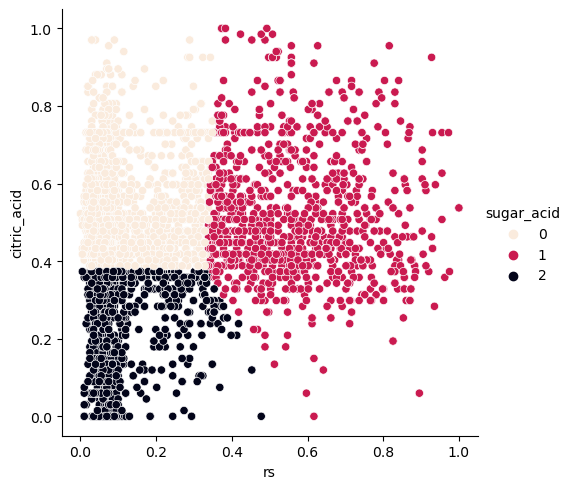

In [34]:
sns.relplot(y = 'citric_acid', x = 'rs', hue='sugar_acid', palette='rocket_r', data=train_scaled)
plt.show()

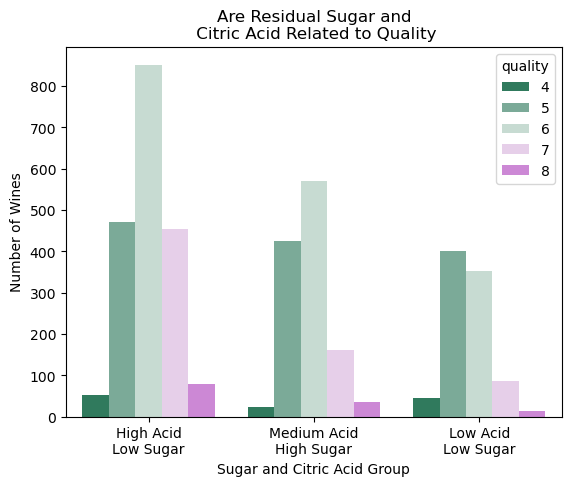

In [35]:
#plotting Sugar and Acid feature against quality
c = sns.diverging_palette(150, 300, s = 90)
sns.countplot(train_scaled['sugar_acid'], hue = train_scaled.quality, palette = c)
plt.ylabel('Number of Wines')
plt.xlabel('Sugar and Citric Acid Group')
plt.title('Are Residual Sugar and\n Citric Acid Related to Quality')
labels = ['High Acid\nLow Sugar', 'Medium Acid\nHigh Sugar', 'Low Acid\nLow Sugar']
plt.xticks(ticks = (0, 1, 2), labels = labels)
plt.show()

In [36]:
sugar_acid_result = functions.chi_sq(train_scaled.quality, train_scaled.sugar_acid)

chi^2  = 208.7543
p-value = 0.0000


# Free and total S02 against quality


In [37]:
free_total_train = train_scaled[['free_s02', 'total_s02']]

In [38]:
kmeans = KMeans(n_clusters= 3)

kmeans.fit(free_total_train)

kmeans.predict(free_total_train)

array([1, 2, 2, ..., 0, 0, 1], dtype=int32)

In [39]:
train_scaled['sulphites'] = kmeans.predict(free_total_train)
train_scaled.head()

,color,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,sugar_acid,sulphites
983,white,0.281250,0.424242,0.507463,0.179104,0.154545,0.229885,0.239057,0.231762,0.69,0.289855,0.603448,6,0,1
3196,white,0.390625,0.212121,0.567164,0.422886,0.318182,0.390805,0.407407,0.397030,0.25,0.072464,0.448276,7,1,2
4814,white,0.281250,0.484848,0.522388,0.223881,0.154545,0.183908,0.360269,0.220142,0.46,0.608696,0.689655,6,0,2
5594,red,0.484375,0.863636,0.029851,0.074627,0.518182,0.080460,0.063973,0.651388,0.75,0.608696,0.189655,6,2,1
5813,red,0.734375,0.356061,0.597015,0.079602,0.636364,0.022989,0.000000,0.517108,0.55,0.608696,0.603448,6,0,1


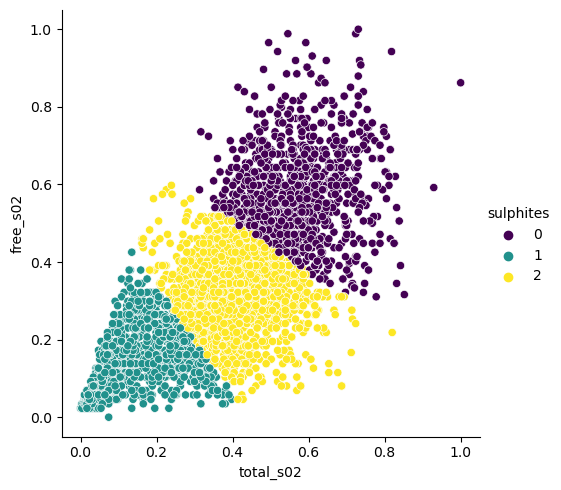

In [40]:
sns.relplot(y = 'free_s02', x = 'total_s02', hue='sulphites', palette='viridis', data=train_scaled)
plt.show()

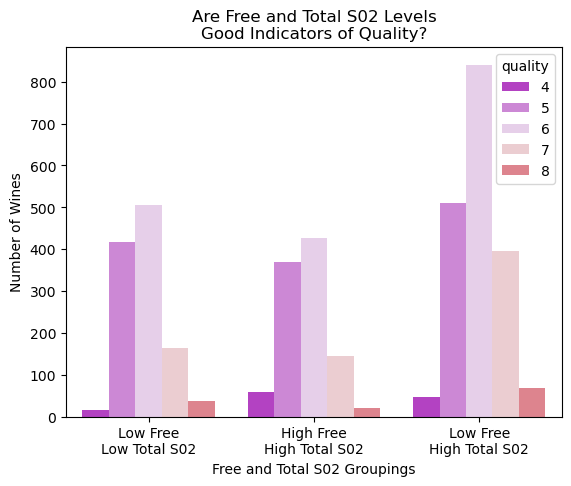

In [41]:
#plotting Free and Total S02 feature against quality
c = sns.diverging_palette(300, 10, s = 90)
sns.countplot(train_scaled['sulphites'], hue = train_scaled.quality, palette = c, orient = "h")
plt.ylabel('Number of Wines')
plt.xlabel('Free and Total S02 Groupings')
plt.title('Are Free and Total S02 Levels\nGood Indicators of Quality?')
labels = ['Low Free\nLow Total S02', 'High Free\nHigh Total S02', 'Low Free\nHigh Total S02']
plt.xticks(ticks = (0, 1, 2), labels = labels)
plt.show()

In [42]:
sulphites_result = functions.chi_sq(train_scaled.quality, train_scaled.sulphites)

chi^2  = 96.6180
p-value = 0.0000


# Sugar and density

In [43]:
rs_den_train = train_scaled[['rs', 'density']]

In [44]:
kmeans = KMeans(n_clusters= 3)

kmeans.fit(rs_den_train)

kmeans.predict(rs_den_train)

array([2, 0, 2, ..., 1, 1, 0], dtype=int32)

In [45]:
train_scaled['sugar_dens'] = kmeans.predict(rs_den_train)
train_scaled.head()

,color,fixed_acidity,volatile_acidity,citric_acid,rs,chlorides,free_s02,total_s02,density,pH,sulphates,alcohol,quality,sugar_acid,sulphites,sugar_dens
983,white,0.281250,0.424242,0.507463,0.179104,0.154545,0.229885,0.239057,0.231762,0.69,0.289855,0.603448,6,0,1,2
3196,white,0.390625,0.212121,0.567164,0.422886,0.318182,0.390805,0.407407,0.397030,0.25,0.072464,0.448276,7,1,2,0
4814,white,0.281250,0.484848,0.522388,0.223881,0.154545,0.183908,0.360269,0.220142,0.46,0.608696,0.689655,6,0,2,2
5594,red,0.484375,0.863636,0.029851,0.074627,0.518182,0.080460,0.063973,0.651388,0.75,0.608696,0.189655,6,2,1,0
5813,red,0.734375,0.356061,0.597015,0.079602,0.636364,0.022989,0.000000,0.517108,0.55,0.608696,0.603448,6,0,1,0


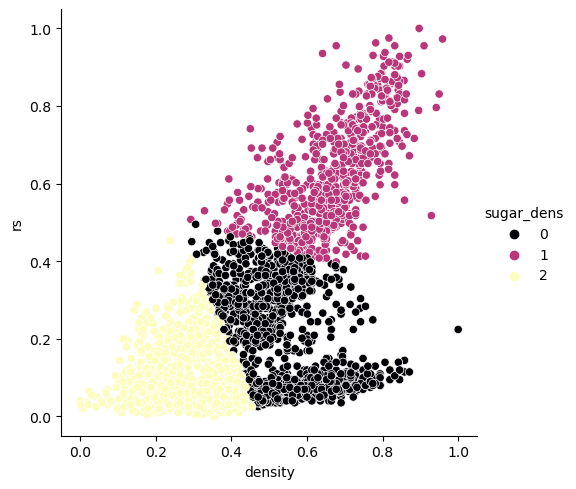

In [46]:
sns.relplot(y = 'rs', x = 'density', hue='sugar_dens', palette='magma', data=train_scaled)
plt.show()

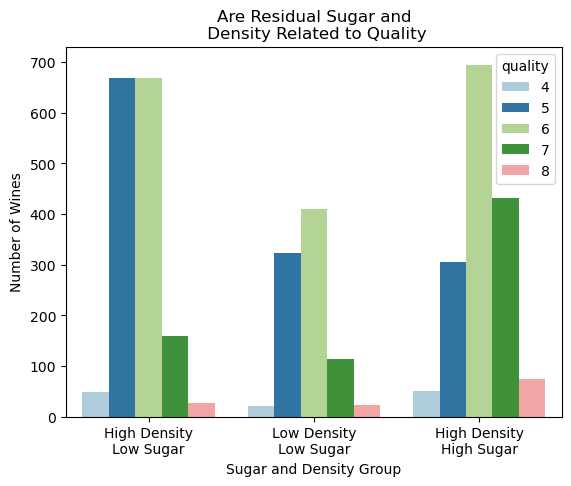

In [47]:
#plotting Sugar and Density feature against quality

sns.countplot(train_scaled['sugar_dens'], hue = train_scaled.quality, palette = "Paired")
plt.ylabel('Number of Wines')
plt.xlabel('Sugar and Density Group')
plt.title('Are Residual Sugar and\n Density Related to Quality')
labels = ['High Density\nLow Sugar', 'Low Density\nLow Sugar', 'High Density\nHigh Sugar']
plt.xticks(ticks = (0, 1, 2), labels = labels)
plt.show()

In [48]:
sugar_density_result = functions.chi_sq(train_scaled.quality, train_scaled.sugar_dens)

chi^2  = 313.7054
p-value = 0.0000


**Hypotheses :**
>>1.
>>- H_0 : The overall quality of the wine has no relationship to its free sulphur dioxide and total sulphur dioxide levels.
>>- H_a : The overall quality of the wine has a relationship to its free sulphur dioxide and total sulphur dioxide levels.
>>2.
>>- H_0 : The levels of citric acid and residual sugar in the wine have no relationship to its quality.
>>- H_a : The levels of citric acid and residual sugar in the wine have no relationship to its quality.
>>3.
>>- H_0 : The density of the wine has no relationship to its quality.
>>- H_a : The density of the wine has a relationship to its quality.
4.
- H_0 : The total residual sugar in and the density of the wine have no relationship to its quality.
- H_a : The total residual sugar in and the density of the wine have a relationship to its quality.